In [1]:
# SUMMARY
# A - Data load
# B - DATA CHECKS
# C - DATA ENRICHMENTS - match countries & city characteristics
# D - DATA CATEGORISATION - create categories
# E - STATS & CORRELATIONS

In [2]:
# -------------------------------------------- #
# A - Data load
# -------------------------------------------- #

import unicodecsv
import pandas as pd

# function read csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#load CSV as list
people_filename = '../data/people.csv'
people = read_csv(people_filename)

people[0]

{'13': 'Other',
 '13.Fear': 'Future, Children, Technology, Obsession, Self-centered, , , , , , , , , , ',
 '14': '',
 '14.Dream': 'Good, Generosity, Health, Inequality, , , , , , , , , , , ',
 '32': '',
 '32.betterworse': 'KO',
 'Age': '30',
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': '0',
 'Occupation type': 'Student',
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': '10'}

In [3]:
# -------------------------------------------- #
# B - DATA CHECKS
# -------------------------------------------- #
# Part 1 - Look for duplicate in the ref value
print (len(people))
unique_people = set()
duplicate = list()
for person in people:
    if person['REF'] in unique_people:
        duplicate.append(person['REF'])
    unique_people.add(person['REF'])
print (len(unique_people))
print(duplicate)

437
437
[]


In [4]:
# -------------------------------------------- #
# DATA CHECKS
# -------------------------------------------- #
# 2 - Adult / Children

In [5]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return 0
    else:
        return int(i)

for person in people:
    person['Age'] = parse_maybe_int(person['Age'])
    person['Number of kids'] = parse_maybe_int(person['Number of kids'])
    person['Years of studies'] = parse_maybe_int(person['Years of studies'])
    
people[0]

{'13': 'Other',
 '13.Fear': 'Future, Children, Technology, Obsession, Self-centered, , , , , , , , , , ',
 '14': '',
 '14.Dream': 'Good, Generosity, Health, Inequality, , , , , , , , , , , ',
 '32': '',
 '32.betterworse': 'KO',
 'Age': 30,
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': 0,
 'Occupation type': 'Student',
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': 10}

In [6]:
df_people = pd.DataFrame(people)
df_people.head()

,13,13.Fear,14,14.Dream,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Occupation type,Place of living,REF,Type of school,Years of studies
0,Other,"Future, Children, Technology, Obsession, Self-...",,"Good, Generosity, Health, Inequality, , , , , ...",,KO,30,Adult,Australia,,F,Phd Student,0,Student,Sydney,AUS001,"Law, Health",10
1,Violence,"Bad intentions, bad people, be fooled, , , , ,...",,"happy life, family, , , , , , , , , , , , ,",,KO,32,Adult,China,,F,Former Consultant,0,Executive & intellectual occupation,Paris,CHN01,Engineering,5
2,World crisis,"World, Futur, Fanatism, , , , , , , , , , , ,",Personal Dream,"Family, Children, Kids, Travels, , , , , , , ,...",,KO,69,Adult,France,,F,Retiree,3,Retiree,Cucq,FR001,,1
3,No fear,"No fear, Fast, , , , , , , , , , , , ,",Personal Dream,"Farm, Agriculture, Vegetables, Travel, , , , ,...",,KO,58,Adult,France,,M,Farmer,2,Farmer,La Calotterie,FR002,,0
4,,", , , , , , , , , , , , , ,",Personal Dream,"Countryside, boyfriend, friends, landscape, na...",,KO,28,Adult,Madagascar,,F,Singer,0,Executive & intellectual occupation,Paris,MAD001,,3


In [7]:
# -------------------------------------------- #
# C - DATA ENRICHMENTS - match countries & city characteristics
# -------------------------------------------- #
# Part 1 - City population 

def is_int(input):
  try:
    num = int(input)
  except ValueError:
    return False
  return True

cities_filename = "../data/citiesList-enriched-16july.csv"
df_cities = pd.DataFrame( read_csv(cities_filename) )

def int_convert(input):
    value = -1
    if is_int(input) == True:
        value = int(input)
    return value
    
df_cities['populationInt'] = df_cities.apply(lambda x: int_convert(x['population']), axis=1)

df_people = pd.merge(df_people, df_cities, on='Place of living', how='left')
df_people.head()

,13,13.Fear,14,14.Dream,32,32.betterworse,Age,Category,Country 1,Country 2,...,Job,Number of kids,Occupation type,Place of living,REF,Type of school,Years of studies,capital,population,populationInt
0,Other,"Future, Children, Technology, Obsession, Self-...",,"Good, Generosity, Health, Inequality, , , , , ...",,KO,30,Adult,Australia,,...,Phd Student,0,Student,Sydney,AUS001,"Law, Health",10,True,4840600,4840600
1,Violence,"Bad intentions, bad people, be fooled, , , , ,...",,"happy life, family, , , , , , , , , , , , ,",,KO,32,Adult,China,,...,Former Consultant,0,Executive & intellectual occupation,Paris,CHN01,Engineering,5,True,2206488,2206488
2,World crisis,"World, Futur, Fanatism, , , , , , , , , , , ,",Personal Dream,"Family, Children, Kids, Travels, , , , , , , ,...",,KO,69,Adult,France,,...,Retiree,3,Retiree,Cucq,FR001,,1,False,5123,5123
3,No fear,"No fear, Fast, , , , , , , , , , , , ,",Personal Dream,"Farm, Agriculture, Vegetables, Travel, , , , ,...",,KO,58,Adult,France,,...,Farmer,2,Farmer,La Calotterie,FR002,,0,False,649,649
4,,", , , , , , , , , , , , , ,",Personal Dream,"Countryside, boyfriend, friends, landscape, na...",,KO,28,Adult,Madagascar,,...,Singer,0,Executive & intellectual occupation,Paris,MAD001,,3,True,2206488,2206488


In [8]:
# Check if all cities are covered
print(df_people['population'].unique())
print(df_people['capital'].unique())
#df_people[ (df_people['capital'] != 'True') & (df_people['capital'] != 'False') ]

print("\n List of capitals : ")
df_know_capital = df_people[ df_people['capital'] == 'True' ]
print(len(df_know_capital))
print(df_know_capital["Place of living"].unique())
print(df_know_capital['Place of living'].value_counts())

df_unknow_capital = df_people[ df_people['capital'] == 'City not found' ]
print("\n Number of people with unknow city's capital status (= unknow city) : ")
print(len(df_unknow_capital))
print(df_unknow_capital["Place of living"].unique())


df_unknow_population = df_people[ (df_people['population'] == 'Not found') | (df_people['population'] == 'City not found') ]
print("\n Number of people with unknow city's population : ")
print(len(df_unknow_population))
print(df_unknow_population["Place of living"].unique())


['4840600' '2206488' '5123' '649' '5888926' 'Not found' '64450' '438800'
 '3182981' '8787892' '14657434' '277270' '2890151' '10849' '1403000'
 '28339' '110993' '536000' '8537673' '5640' '135783' '598830' '1756926'
 '10585' '757184' '1984' '8846782' '8574974' '435114' '6093472' '85428'
 '2902927' 'City not found' '2046' '8181047' '507324' '32781' '1197816'
 '384320' '680250' '98153' '12500123' '1082400' '623736' '1500' '9857426'
 '1396288' '2689845' '5430000' '1726889' '257803' '876824' '3976322'
 '4496694' '10535000' '975453' '5480' '1565572' '1464301' '3385000'
 '1756126' '653337' '60928' '16431' '7143']
['True' 'False' 'City not found']

 List of capitals : 
222
['Sydney' 'Paris' 'Madrid' 'London' 'Strasbourg' 'Buenos Aires' 'La Paz'
 'Tehran' 'Lima' 'Bogotá' 'Tbilisi' 'Seoul' 'Ulaanbaatar' 'Taipei'
 'New Delhi' 'Bangalore' 'Kathmandu' 'Addis Ababa']
Paris           60
London          34
New Delhi       22
Madrid          21
Ulaanbaatar     18
Tehran          17
Addis Ababa     15
Ka

In [9]:
# Part 2 - Country data

countries_filename = "../data/UNSD-countries.csv"
df_countries = pd.DataFrame( read_csv(countries_filename) )
df_countries = df_countries[['Country or Area', 'Developed / Developing Countries', 'Region Name', 'Sub-region Name']]
df_countries.columns = ['Country 1', 'Country Development', 'Continent', 'World Region']
#df_countries.head()

df_people = pd.merge(df_people, df_countries, on='Country 1', how='left')
df_people.head()

,13,13.Fear,14,14.Dream,32,32.betterworse,Age,Category,Country 1,Country 2,...,Place of living,REF,Type of school,Years of studies,capital,population,populationInt,Country Development,Continent,World Region
0,Other,"Future, Children, Technology, Obsession, Self-...",,"Good, Generosity, Health, Inequality, , , , , ...",,KO,30,Adult,Australia,,...,Sydney,AUS001,"Law, Health",10,True,4840600,4840600,Developed,Oceania,Australia and New Zealand
1,Violence,"Bad intentions, bad people, be fooled, , , , ,...",,"happy life, family, , , , , , , , , , , , ,",,KO,32,Adult,China,,...,Paris,CHN01,Engineering,5,True,2206488,2206488,Developing,Asia,Eastern Asia
2,World crisis,"World, Futur, Fanatism, , , , , , , , , , , ,",Personal Dream,"Family, Children, Kids, Travels, , , , , , , ,...",,KO,69,Adult,France,,...,Cucq,FR001,,1,False,5123,5123,Developed,Europe,Western Europe
3,No fear,"No fear, Fast, , , , , , , , , , , , ,",Personal Dream,"Farm, Agriculture, Vegetables, Travel, , , , ,...",,KO,58,Adult,France,,...,La Calotterie,FR002,,0,False,649,649,Developed,Europe,Western Europe
4,,", , , , , , , , , , , , , ,",Personal Dream,"Countryside, boyfriend, friends, landscape, na...",,KO,28,Adult,Madagascar,,...,Paris,MAD001,,3,True,2206488,2206488,Developing,Africa,Sub-Saharan Africa


In [10]:
# Check if all countries are covered
print(df_people['Continent'].unique())
# not_found = df_people[ (df_people['Continent'] != 'Oceania') & (df_people['Continent'] != 'Asia') & (df_people['Continent'] != 'Europe')  & (df_people['Continent'] != 'Africa') & (df_people['Continent'] != 'Americas') ]
# not_found['Country 1'].unique()

['Oceania' 'Asia' 'Europe' 'Africa' 'Americas']


In [11]:
# -------------------------------------------- #
# D - DATA CATEGORISATION - create categories
# -------------------------------------------- #

# Categories for quantitative attributes
# -------------------------------------
categories = [
    {
        'index':'Age', 'indexCategory':'AgeCategory',
        'bins': [0, 15, 25, 35, 50, 65, 200], 'labels': ['0-15', '15-25', '25-35', '35-50', '50-65','65+']
    },
    {
        'index':'Years of studies', 'indexCategory':'YearsStudiesCategory',
        'bins': [0, 2, 5, 20], 'labels': ['0-2', '2-5', '5+']
    },
    {
        'index':'Number of kids', 'indexCategory':'NumberKidsCategory',
        'bins': [0, 0.1, 1, 5, 20], 'labels': ['0', '1', '2-5', '5+']
    },
    {
        'index':'populationInt', 'indexCategory':'populationCategory',
        'bins': [0, 5000, 15000, 100000, 1000000, 5000000, 1000000000000], 'labels': ['0-5k', '5-15k', '15-100k','100k-1M', '1M-5M', '5M+']
    }
]

# Create all category from quantitative attribute
for i in range(len(categories)):
    df_people[categories[i]['indexCategory']] = pd.cut( 
        df_people[categories[i]['index']], 
        bins=categories[i]['bins'], 
        include_lowest=True, 
        labels=categories[i]['labels']
    )

def getCityType(population):
    type = "Urban"
    if is_int(population) == False:
        type = "Undefined population"
    elif int(population) < 5000:
        type = "Rural"
    return type

df_people['City Type'] = df_people.apply(lambda x: getCityType(x['population']), axis=1)
df_people.head()

,13,13.Fear,14,14.Dream,32,32.betterworse,Age,Category,Country 1,Country 2,...,population,populationInt,Country Development,Continent,World Region,AgeCategory,YearsStudiesCategory,NumberKidsCategory,populationCategory,City Type
0,Other,"Future, Children, Technology, Obsession, Self-...",,"Good, Generosity, Health, Inequality, , , , , ...",,KO,30,Adult,Australia,,...,4840600,4840600,Developed,Oceania,Australia and New Zealand,25-35,5+,0,1M-5M,Urban
1,Violence,"Bad intentions, bad people, be fooled, , , , ,...",,"happy life, family, , , , , , , , , , , , ,",,KO,32,Adult,China,,...,2206488,2206488,Developing,Asia,Eastern Asia,25-35,2-5,0,1M-5M,Urban
2,World crisis,"World, Futur, Fanatism, , , , , , , , , , , ,",Personal Dream,"Family, Children, Kids, Travels, , , , , , , ,...",,KO,69,Adult,France,,...,5123,5123,Developed,Europe,Western Europe,65+,0-2,2-5,5-15k,Urban
3,No fear,"No fear, Fast, , , , , , , , , , , , ,",Personal Dream,"Farm, Agriculture, Vegetables, Travel, , , , ,...",,KO,58,Adult,France,,...,649,649,Developed,Europe,Western Europe,50-65,0-2,2-5,0-5k,Rural
4,,", , , , , , , , , , , , , ,",Personal Dream,"Countryside, boyfriend, friends, landscape, na...",,KO,28,Adult,Madagascar,,...,2206488,2206488,Developing,Africa,Sub-Saharan Africa,25-35,2-5,0,1M-5M,Urban


In [12]:
# -------------------------------------------- #
# D - DATA CATEGORISATION - create categories
# -------------------------------------------- #

# Categories for qualitative attributes
# -------------------------------------
# -> This is handled at the previous data gathering step for Job Category


In [13]:
#export for d3 cluster tests
df_people[['Gender','Age','AgeCategory']].to_csv('peopleWithCategories.csv')

In [14]:
# -------------------------------------------- #
# E - STATS & CORRELATIONS
# -------------------------------------------- #
# - PART 1 STATS ABOUT PEOPLE CHARACTERISTICS
# -------------------------------------------- #

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

In [15]:
#sns.countplot(y="Country Development", data=df_people, color="c");
#sns.swarmplot(x=df_people["Years of studies"])

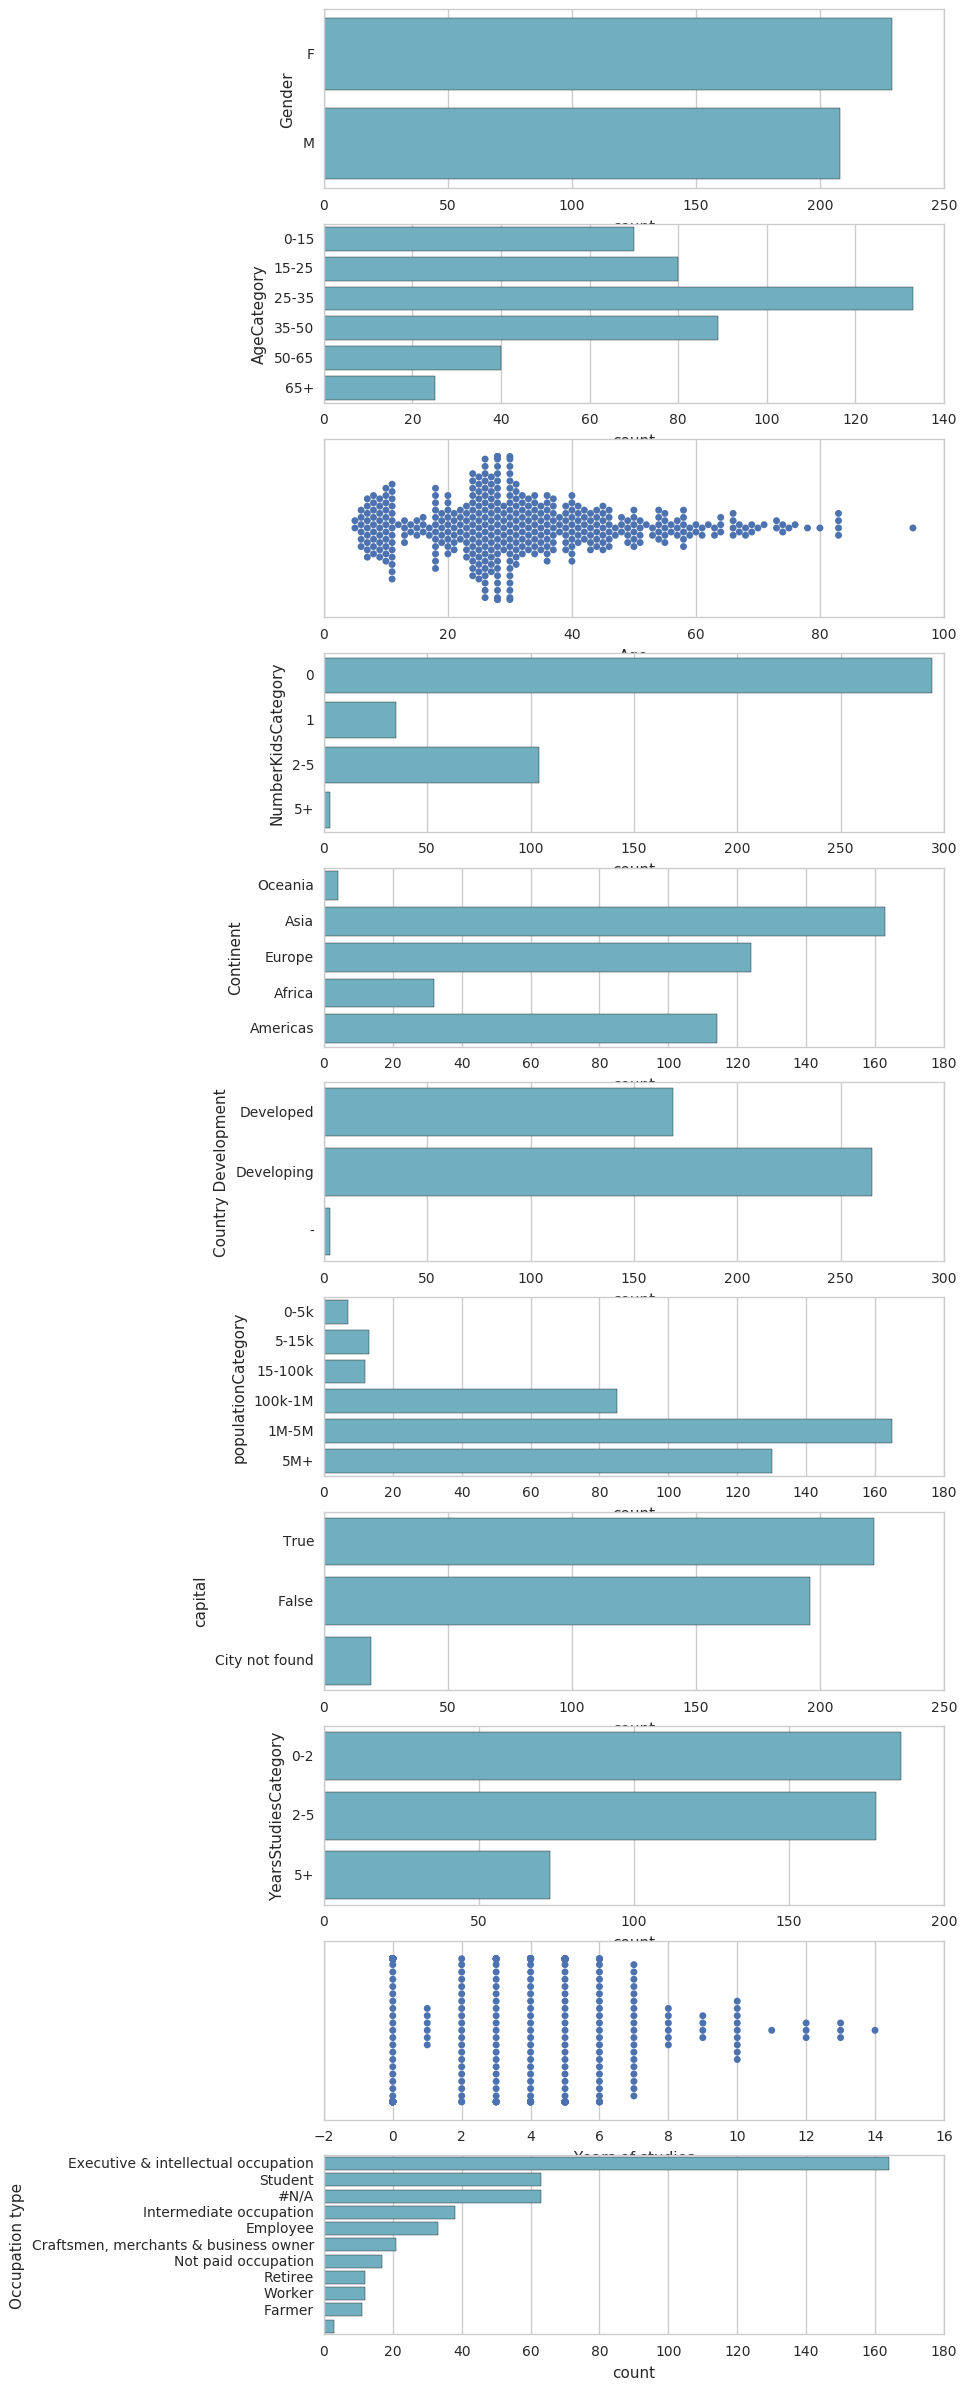

In [16]:
# Overview of people characteristics

fig, axarr = plt.subplots(11, 1, figsize=(8, 30))

sns.countplot(y="Gender", data=df_people, color="c", ax=axarr[0]);

sns.countplot(y="AgeCategory", data=df_people, color="c", ax=axarr[1]);
sns.swarmplot(x=df_people["Age"], ax=axarr[2]);

sns.countplot(y="NumberKidsCategory", data=df_people, color="c", ax=axarr[3]);

sns.countplot(y="Continent", data=df_people, color="c", ax=axarr[4]);
sns.countplot(y="Country Development", data=df_people, color="c", ax=axarr[5]);
sns.countplot(y="populationCategory", data=df_people, color="c", ax=axarr[6]);
sns.countplot(y="capital", data=df_people, color="c", ax=axarr[7]);

sns.countplot(y="YearsStudiesCategory", data=df_people, color="c", ax=axarr[8]);
sns.swarmplot(x=df_people["Years of studies"], ax=axarr[9]);

# Repartition of occupation type
sns.countplot(
    y="Occupation type", 
    data=df_people, 
    color="c",
    order = df_people['Occupation type'].value_counts().index,
    ax=axarr[10]);
#sns.swarmplot(x=df_people["population"],ax=axarr[4]);

/home/grossedondon/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


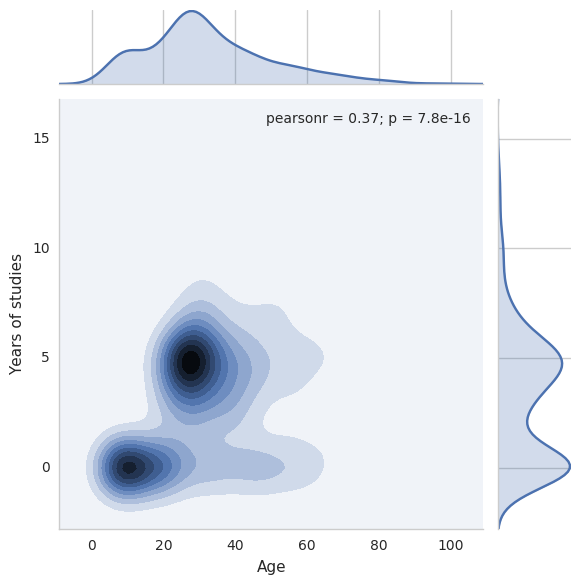

In [17]:
#More fancy chart
sns.jointplot(x="Age", y="Years of studies", data=df_people, kind="kde");

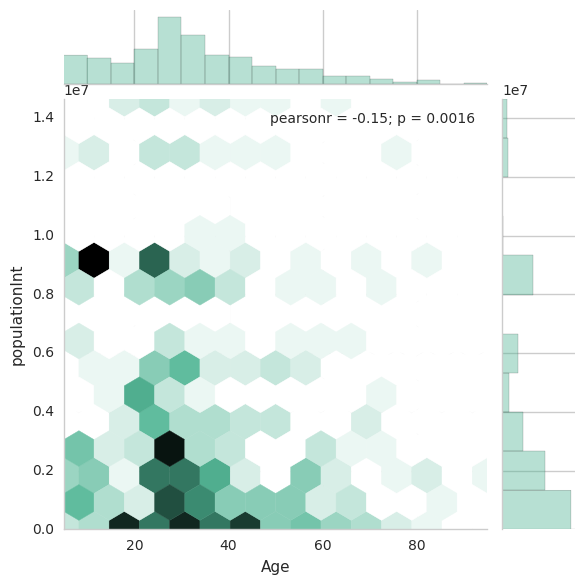

In [18]:
sns.jointplot(df_people['Age'], df_people['populationInt'], kind="hex", color="#4CB391")

In [19]:
# - PART 2 STATS REGARDING 32 ANSWERS
# -------------------------------------------- #
def getDfQuestion(df_original,questionIndex, questionName):
    df_question = df_original[df_original[questionIndex] != '']
    print("People answering the question : " + questionName)
    print("-> " + str(round(len(df_question)/len(df_original)*100,1)) + "% of total interviewed people\n")
    return df_question

def getCategoriesOrdered(df,questionIndex):
    valuesCount = df[questionIndex].value_counts()
    
    indexSorted = valuesCount.index.values.tolist()
    
    valuesCount_df = pd.DataFrame(valuesCount)
    valuesCount_df['%'] = valuesCount_df[questionIndex] / len(df)
    
    print('Answers :' + str(indexSorted))
    print(valuesCount_df)
    print("----------------------------- \n ")
    return indexSorted

df_32 = getDfQuestion(df_people,'32', ' "Avez-vous la sensation que votre vie est plus simple ou plus difficile que celle de vos parents ?"')
categories_32 = getCategoriesOrdered(df_32,'32')

df_14 = getDfQuestion(df_people,'14', ' "Quel est ton rêve ?"')
categories_14 = getCategoriesOrdered(df_14,'14')

df_13 = getDfQuestion(df_people,'13', ' "De quoi avez-vous peur ? "')
categories_13 = getCategoriesOrdered(df_14,'13')

People answering the question :  "Avez-vous la sensation que votre vie est plus simple ou plus difficile que celle de vos parents ?"
-> 32.7% of total interviewed people

Answers :['Better', 'Both', 'Worse', 'Neutral', 'Cannot compare']
                32         %
Better          78  0.545455
Both            25  0.174825
Worse           19  0.132867
Neutral         13  0.090909
Cannot compare   8  0.055944
----------------------------- 
 
People answering the question :  "Quel est ton rêve ?"
-> 40.0% of total interviewed people

Answers :['Personal Dream', 'Dream for the World', 'Other']
                      14         %
Personal Dream       128  0.731429
Dream for the World   39  0.222857
Other                  8  0.045714
----------------------------- 
 
People answering the question :  "De quoi avez-vous peur ? "
-> 52.9% of total interviewed people

Answers :['Death / Disease', 'Other', 'Violence', 'Losing loved ones', 'Personal failure', 'Loneliness', 'Insects, height', 'World 

In [108]:
# function draw heatmap
def dataHeatmap(data,question,characteristic,cols_ordered):
    cross = pd.crosstab(index=data[characteristic], columns=df_32[question], normalize='index', margins=True)
    cross = cross[cols_ordered]
    return cross

def drawHeatmapSimpleAx(data,fig_size_x,fig_size_y, annot, ax, axID):
    annotHeatmap = False
    if(annot == True):
        annotHeatmap = True
    plt.figure(figsize=(fig_size_x,fig_size_y))
    sns.heatmap(data, ax=ax[axID], linewidths=2, linecolor='white', annot=annotHeatmap, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))

def drawHeatmapSimple(data,fig_size_x,fig_size_y, annot):
    annotHeatmap = False
    if(annot == True):
        annotHeatmap = True
    plt.figure(figsize=(fig_size_x,fig_size_y))
    sns.heatmap(data, linewidths=2, linecolor='white', annot=annotHeatmap, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))
    
def drawHeatmap(data,question,characteristic,cols_ordered,fig_size_x,fig_size_y):
    #cross = pd.crosstab(index=data[characteristic], columns=df_32[question], normalize='index', margins=True)
    #cross = cross[cols_ordered]
    cross = dataHeatmap(data,question,characteristic,cols_ordered)
    #scale = len(cols_ordered) / (len(data[characteristic].unique())+1)
    #print(len(cols_ordered))
    #print(len(data[characteristic].unique())+1)
    #print("scale :  " + str(scale))
    plt.figure(figsize=(fig_size_x,fig_size_y))
    sns.heatmap(cross, linewidths=2, linecolor='white', cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))
    
def viewSmallCategorical(data, question, categorical, cols_ordered):
    #fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
    fig, axarr = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw = {'width_ratios':[5, 3]})
    
    sns.countplot(x=question, hue=categorical, data=data, ax=axarr[0])
    sns.heatmap(dataHeatmap(data,question,categorical,cols_ordered), linewidths=2, linecolor='white', 
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            ax=axarr[1])
    
def dualViewQuantitative(data, question, quanti, categorical, cols_ordered):
    fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
    
    sns.heatmap(dataHeatmap(data,question,categorical,cols_ordered), linewidths=2, linecolor='white', 
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            ax=axarr[0])
    sns.countplot(x=question, hue=categorical, data=data, ax=axarr[1])
    
    sns.violinplot(x=quanti, y=question, data=data, bw=.2, ax=axarr[2])
    sns.swarmplot(x=quanti, y=question, color="k", size=3, data=data, ax=axarr[2])
    
def stackedBarPlot(data, attributeName, attributeList, questionID, questionCategories, colorTab):
    
    val = dataHeatmap(data, questionID, attributeName, questionCategories)
    #print(val)

    list = []
    r = []
    for i in range(len(attributeList)):
        r.append(i)

    for cat in questionCategories:
        list.append(val[cat].tolist())
        
    # plot
    barWidth = 0.85
    plt.figure(figsize=(4,2))  
    fig, ax = plt.subplots()
    
    plt.bar(r, list[0], bottom=None, color=colorTab[0], edgecolor='white', width=barWidth, label=questionCategories[0] ,align='center')
    plt.bar(r, list[1], bottom=list[0], color=colorTab[1], edgecolor='white', width=barWidth, label=questionCategories[1] ,align='center')
    plt.bar(r, list[2], bottom=[a+b for a,b in zip(list[0], list[1])], color=colorTab[2], edgecolor='white', width=barWidth, label=questionCategories[2] ,align='center')
    if len(list) > 3:
        plt.bar(r, list[3], bottom=[a+b+c for a,b,c in zip(list[0], list[1], list[2])], color=colorTab[3], edgecolor='white', width=barWidth, label=questionCategories[3] ,align='center')
    if len(list) > 4:
        plt.bar(r, list[4], bottom=[a+b+c+d for a,b,c,d in zip(list[0], list[1], list[2], list[3])], color=colorTab[4], edgecolor='white', width=barWidth, label=questionCategories[4] ,align='center')
    if len(list) > 5:
        plt.bar(r, list[5], bottom=[a+b+c+d+e for a,b,c,d,e in zip(list[0], list[1], list[2], list[3], list[4])], color=colorTab[5], edgecolor='white', width=barWidth, label=questionCategories[5] ,align='center')
    # Custom x axis
    plt.xticks(r, attributeList)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

    # Show graphic
    plt.show()
    
colorTab = sns.color_palette("Set2")

def viewSmallCategorical2(data, question, categorical, cols_ordered, colorTab):
    #fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
    fig, axarr = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw = {'width_ratios':[5, 3]})
    
    sns.countplot(x=question, hue=categorical, data=data, ax=axarr[0])
    
    #stackedBarPlot(data, "populationCategory", populationCategory, '14', cols_ordered, colorTab)
    
def allGraphs(data, question, cols_ordered):
    #gender = ['F', 'M']
    #viewSmallCategorical2(data,question, "Gender", cols_ordered, cols_ordered,cols_ordered)
    dualViewQuantitative(data,question, "Age", "AgeCategory", cols_ordered)
    dualViewQuantitative(data,question, "Number of kids", "NumberKidsCategory", cols_ordered)
    dualViewQuantitative(data,question, "Years of studies", "YearsStudiesCategory", cols_ordered)
    viewSmallCategorical(data,question, "Country Development", cols_ordered);
    viewSmallCategorical(data,question, "populationCategory", cols_ordered);
    drawHeatmap(data,question,'Occupation type',cols_ordered, 3.2, 6)


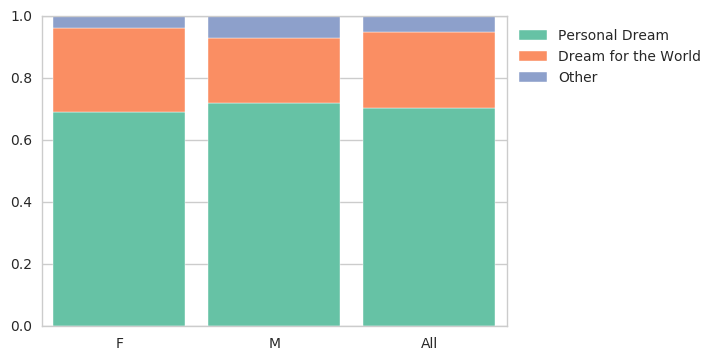

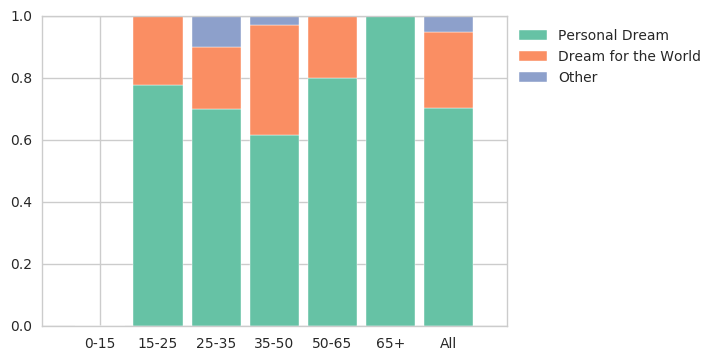

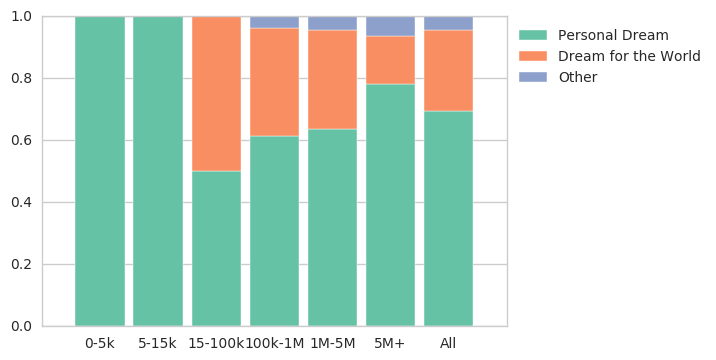

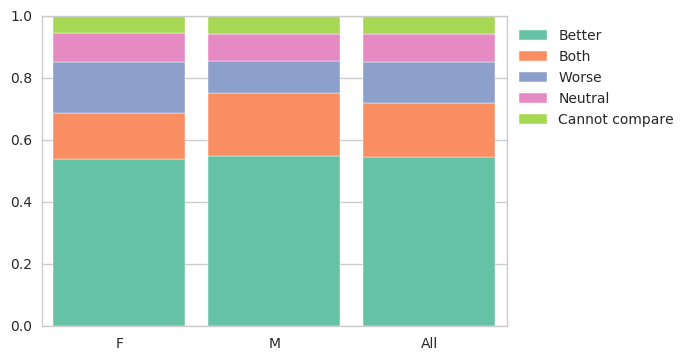

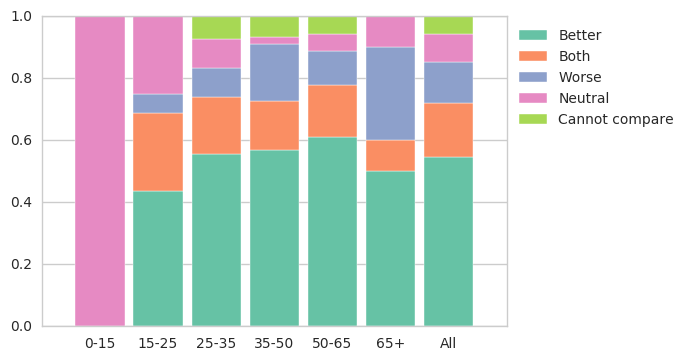

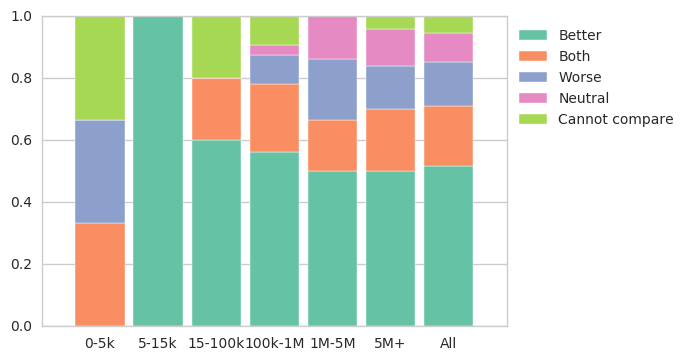

In [111]:
   
populationCategory = ['0-5k', '5-15k', '15-100k','100k-1M', '1M-5M', '5M+', 'All']
genderCategory = ['F', 'M','All']
ageCategory = ['0-15', '15-25', '25-35', '35-50', '50-65','65+','All']

stackedBarPlot(df_14, "Gender", genderCategory, '14', categories_14, colorTab)
stackedBarPlot(df_14, "AgeCategory", ageCategory, '14', categories_14, colorTab)
stackedBarPlot(df_14, "populationCategory", populationCategory, '14', categories_14, colorTab)

stackedBarPlot(df_32, "Gender", genderCategory, '32', categories_32, colorTab)
stackedBarPlot(df_32, "AgeCategory", ageCategory, '32', categories_32, colorTab)
stackedBarPlot(df_32, "populationCategory", populationCategory, '32', categories_32, colorTab)

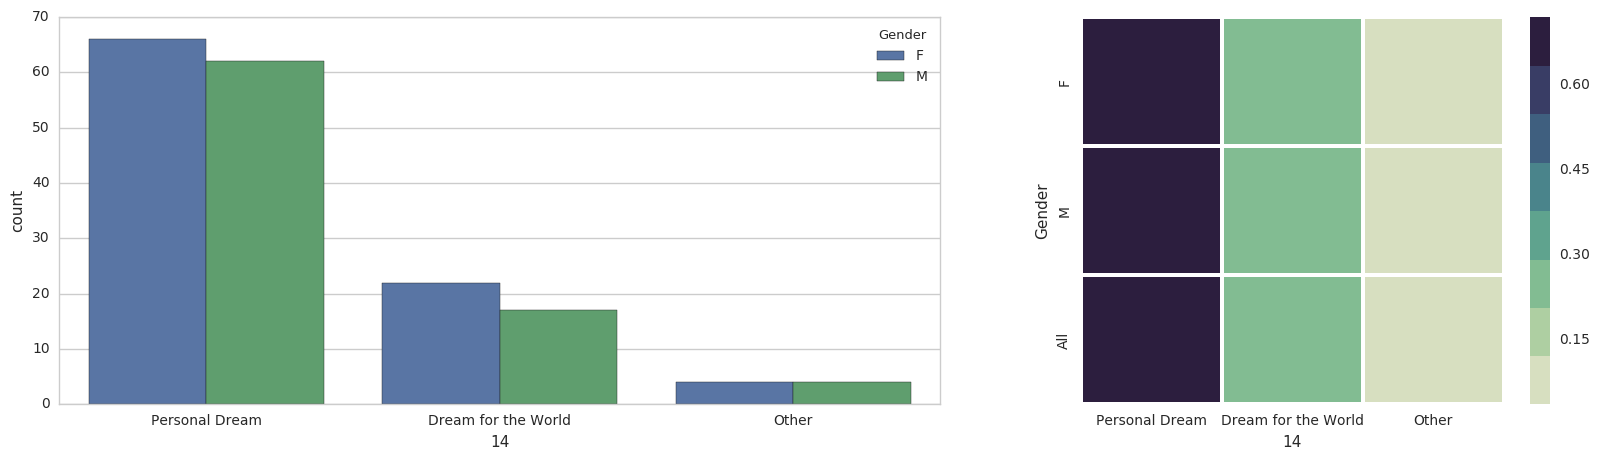

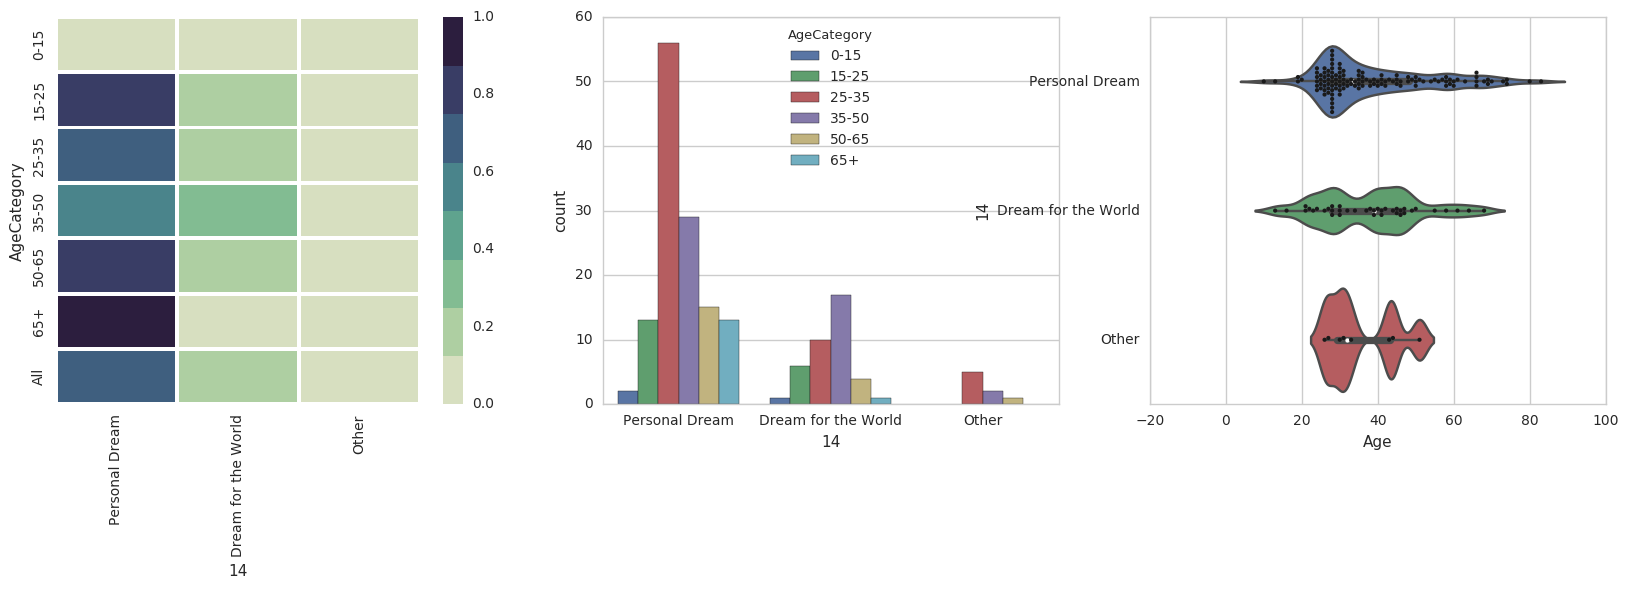

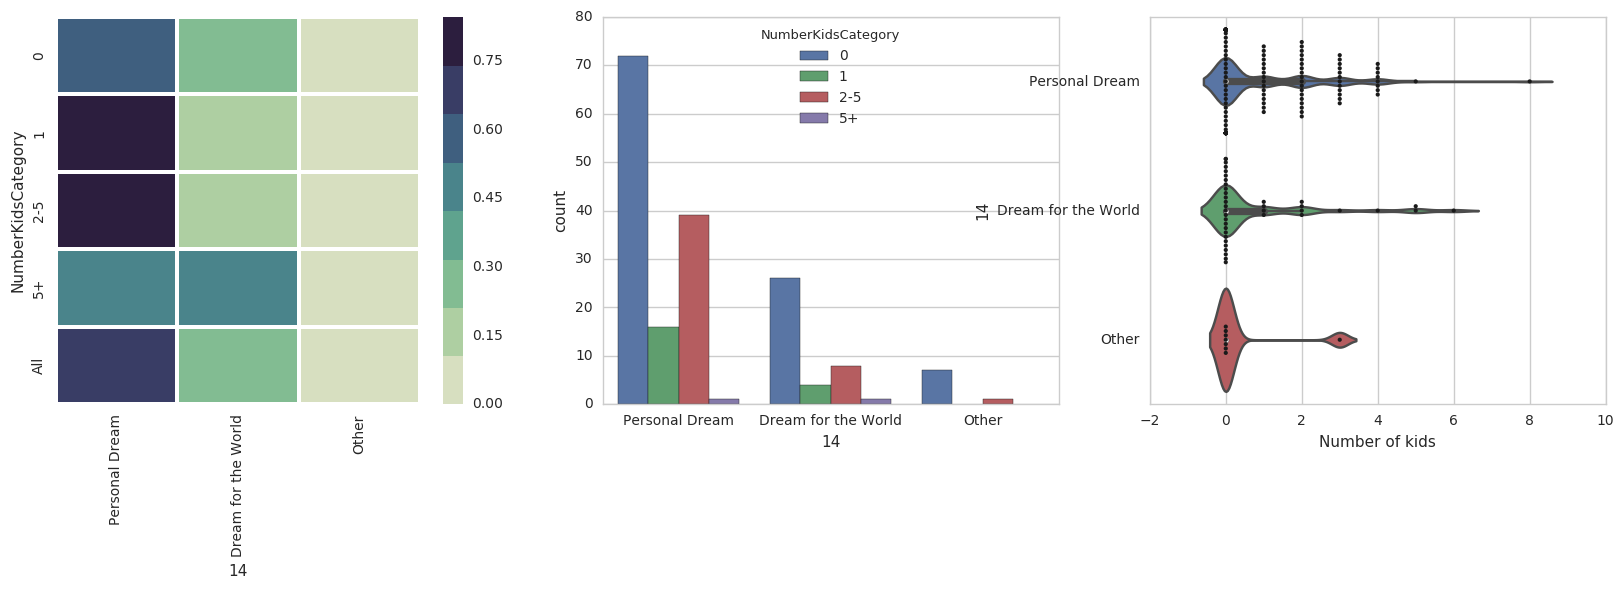

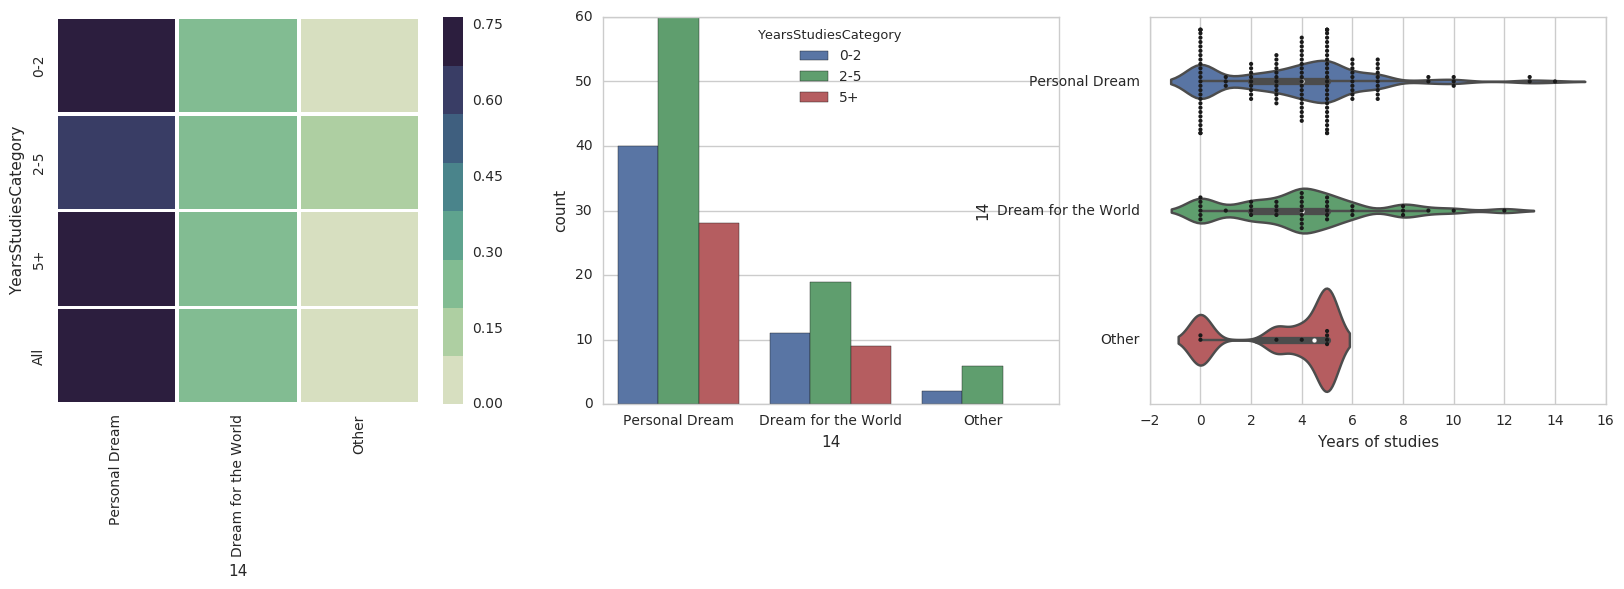

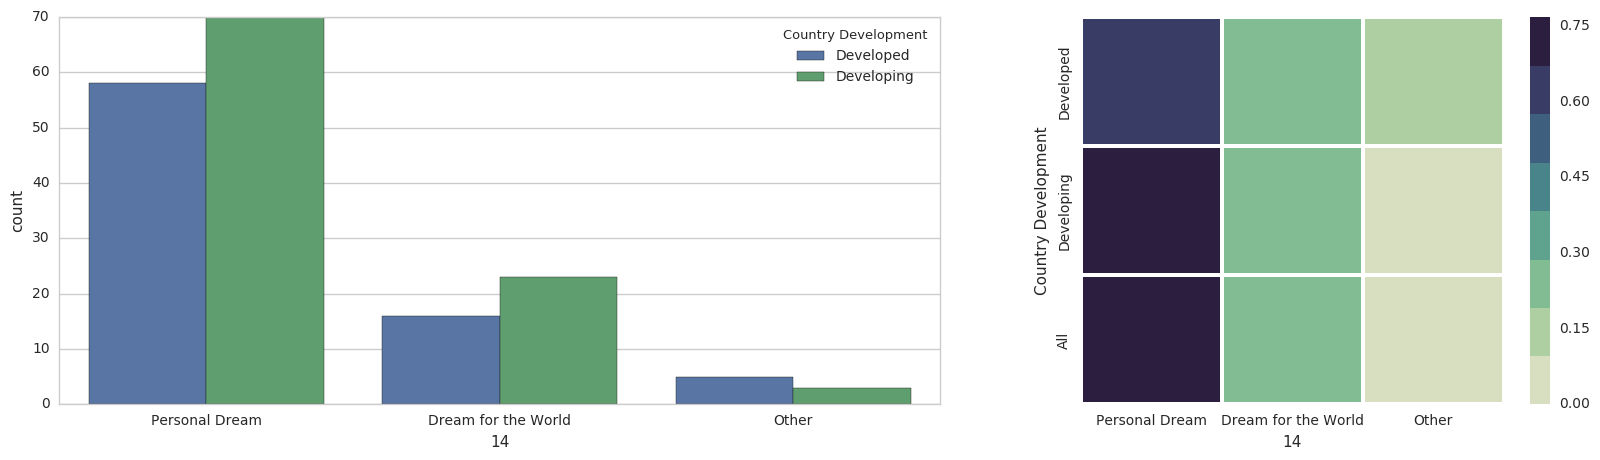

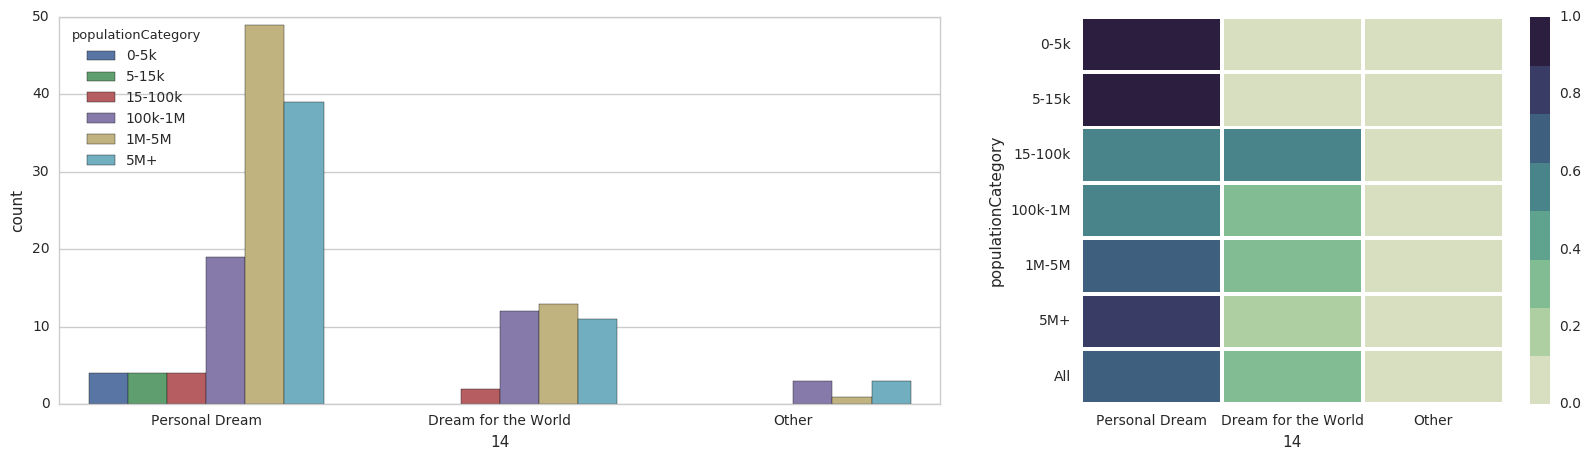

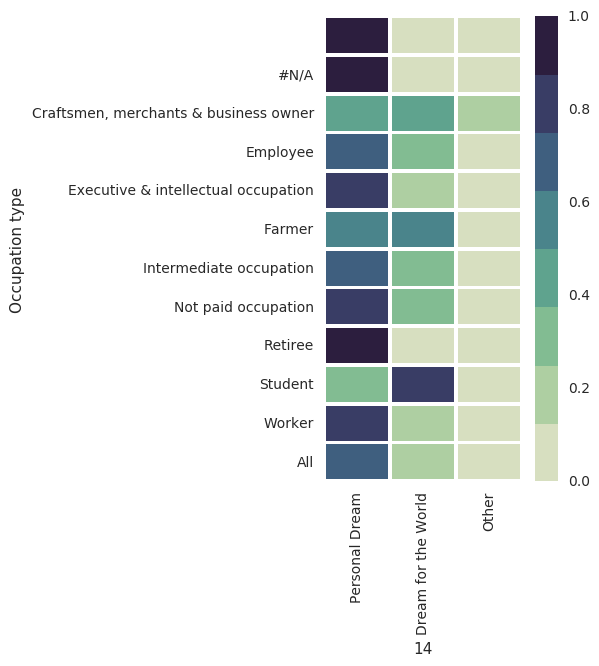

In [114]:
allGraphs(df_14, '14', categories_14)

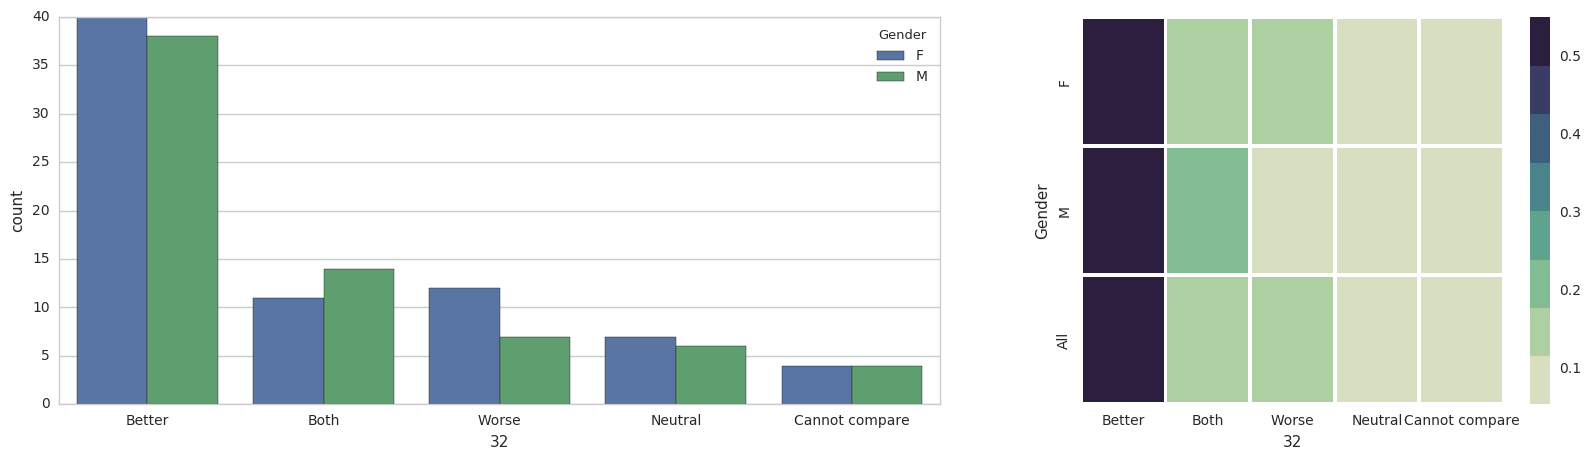

In [96]:
viewSmallCategorical(df_32,"32", "Gender", categories_32);

#sns.countplot(y="32", hue="Gender", data=df_32)
#drawHeatmap(df_32,'32','Gender',cols_ordered, 4, 2)
#pd.crosstab(index=df_32.Gender, columns=df_32['32'], normalize='index', margins=True)
#pd.crosstab(index=df_32['32'], columns=df_32.Gender, normalize='index', margins=True)

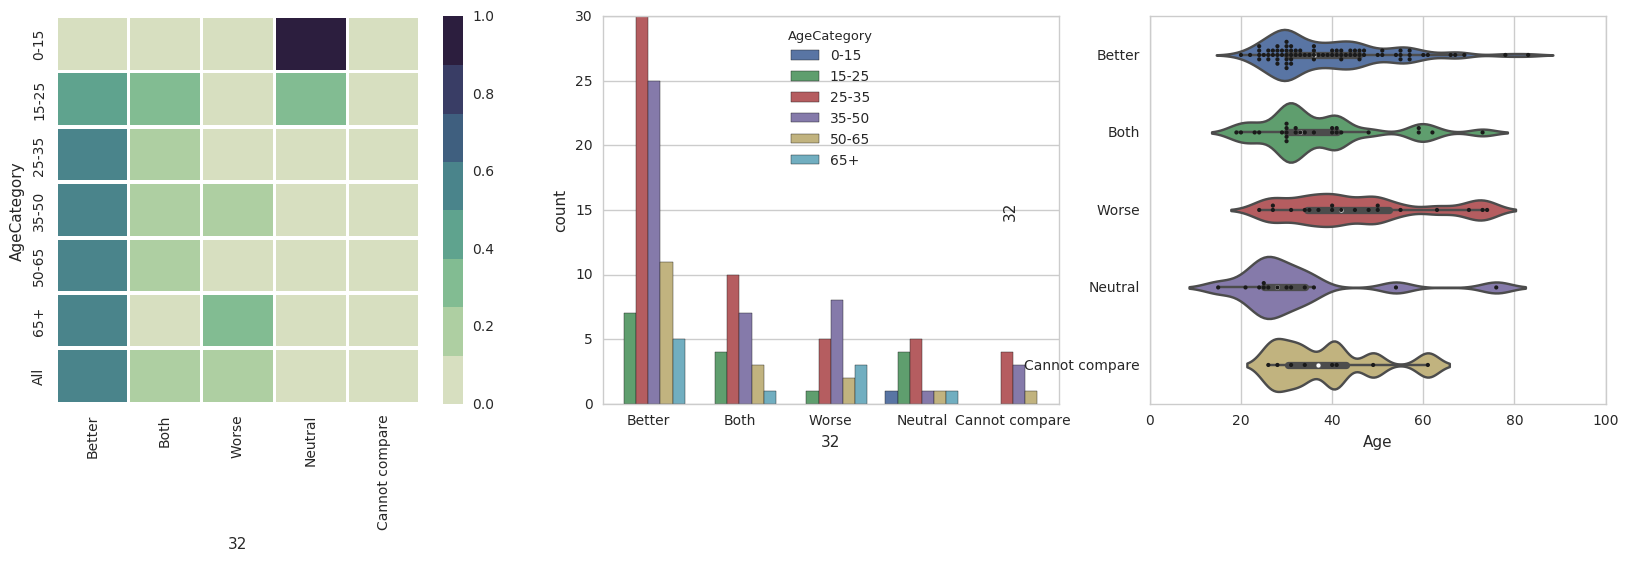

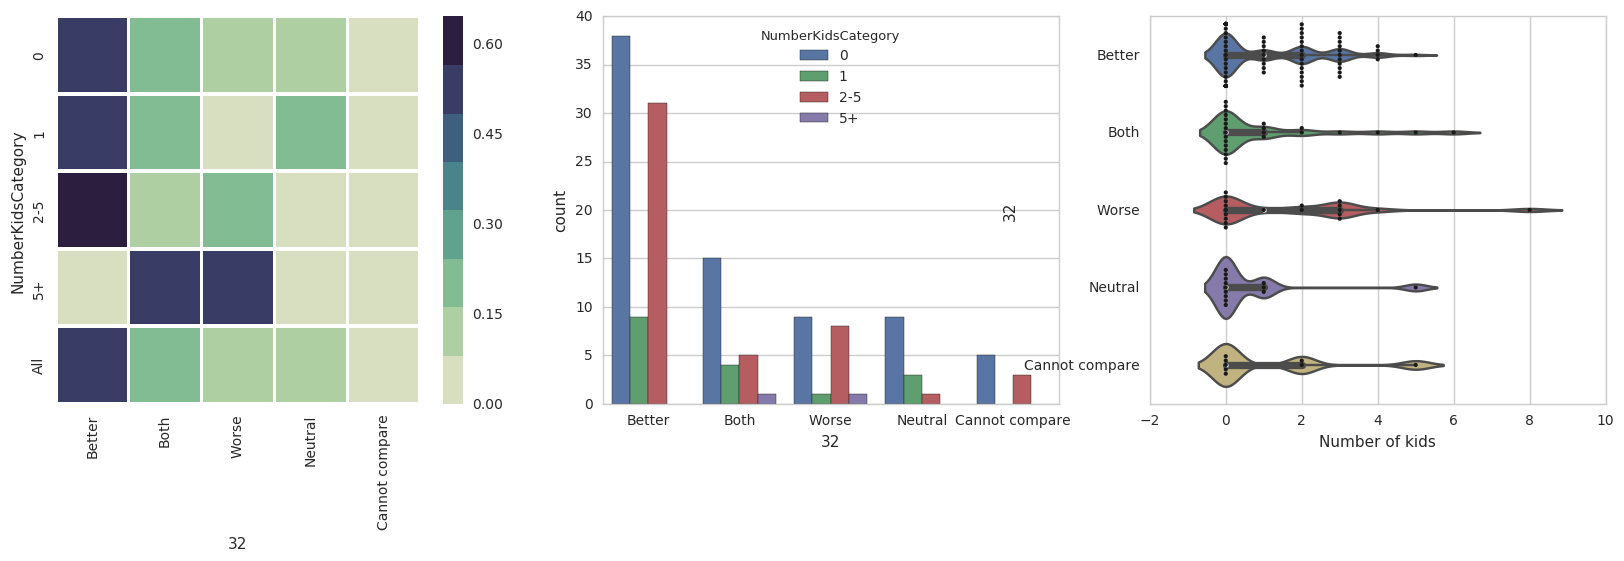

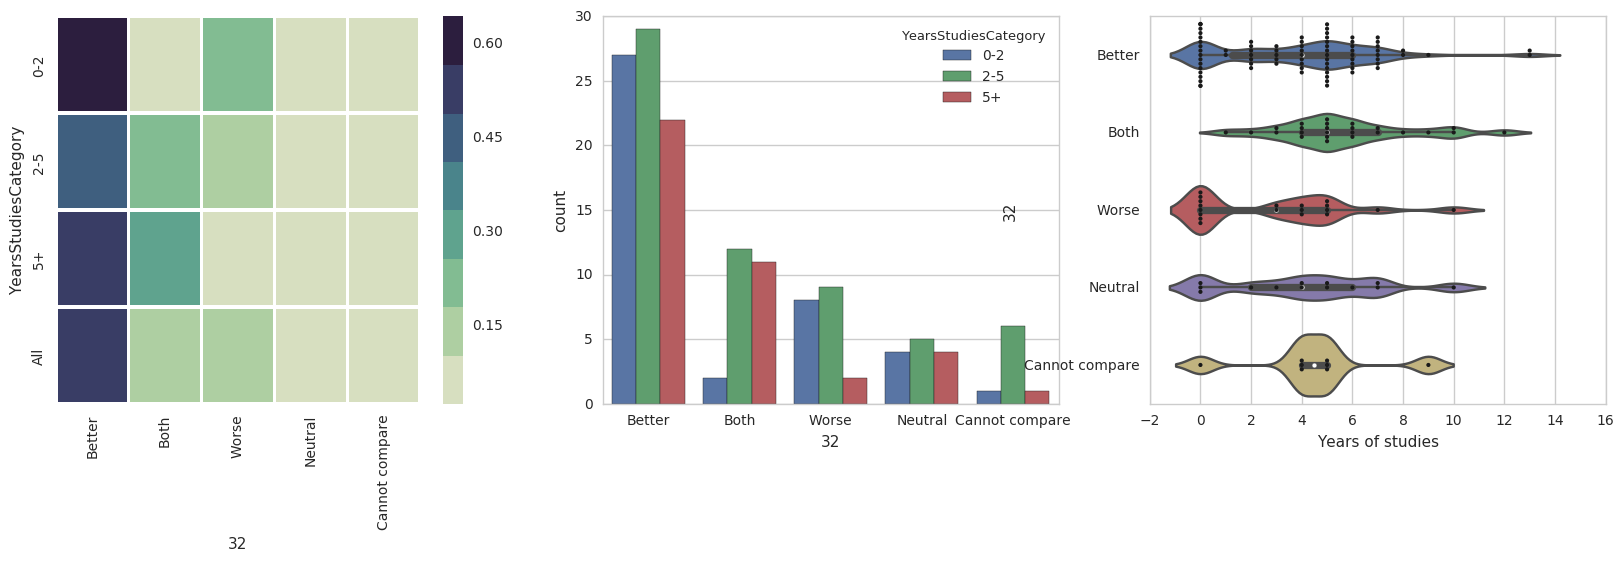

In [163]:
dualViewQuantitative(df_32,"32", "Age", "AgeCategory");
dualViewQuantitative(df_32,"32", "Number of kids", "NumberKidsCategory");
dualViewQuantitative(df_32,"32", "Years of studies", "YearsStudiesCategory");

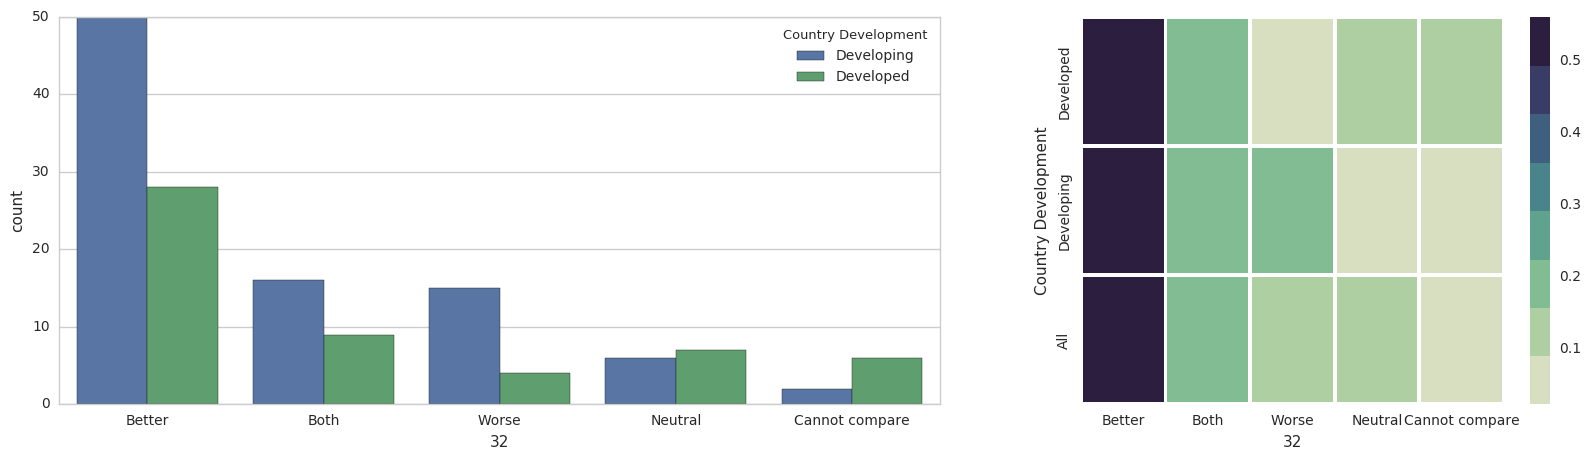

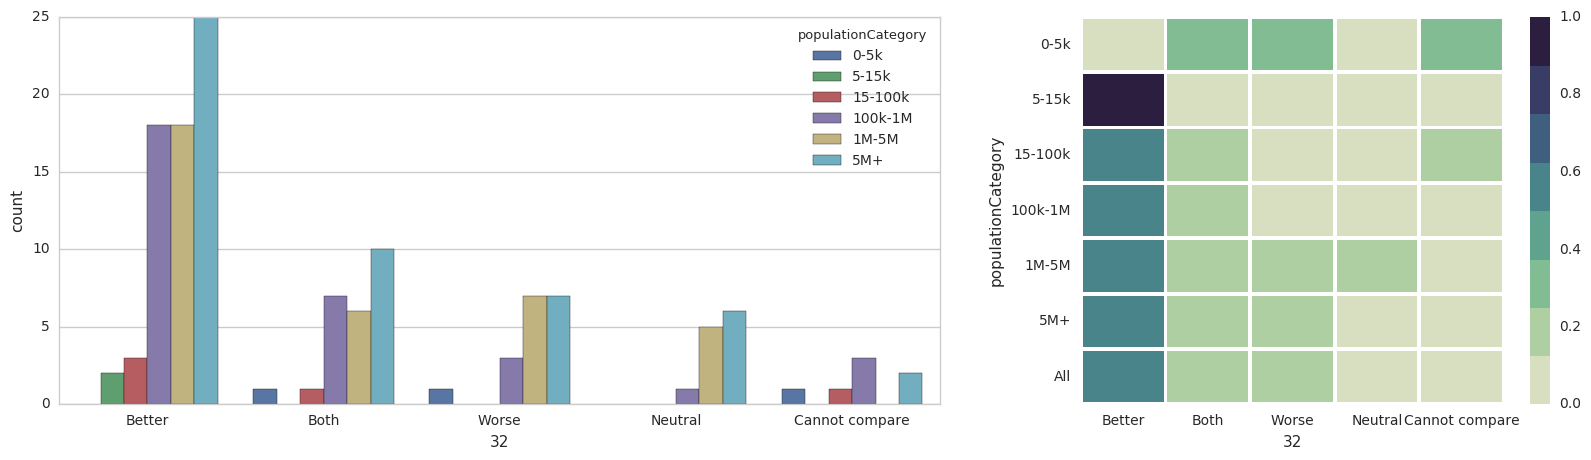

In [164]:
#sns.countplot(y="32", hue="Country Development", data=df_32)
viewSmallCategorical(df_32,"32", "Country Development", cols_ordered);
viewSmallCategorical(df_32,"32", "populationCategory", cols_ordered);

In [165]:
#fig_2, axarr_2 = plt.subplots(1, 2, figsize=(10, 4))

#sns.heatmap(cross_continent_perc, linewidths=2, linecolor='white', 
#            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
#            ax=axarr_2[0])

#sns.heatmap(cross_continent_perc_2, linewidths=2, linecolor='white', 
#            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
#            ax=axarr_2[1])

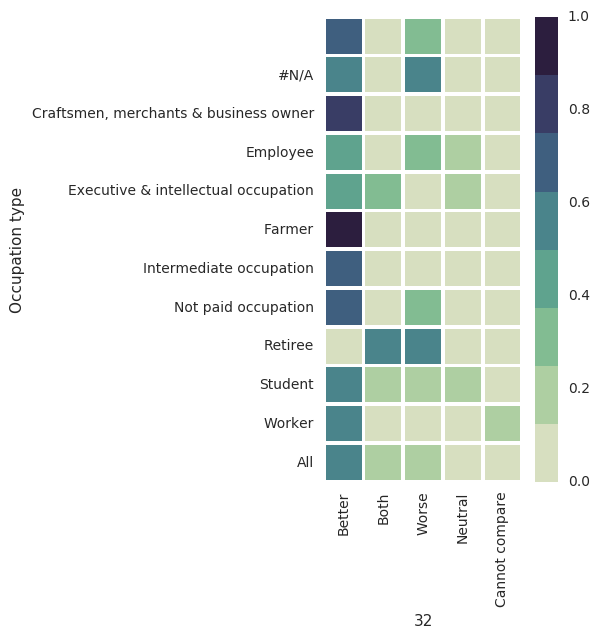

In [166]:
drawHeatmap(df_32,'32','Occupation type',cols_ordered, 3.2, 6)

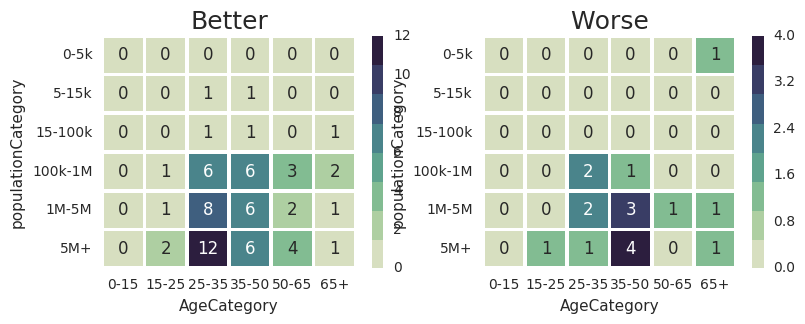

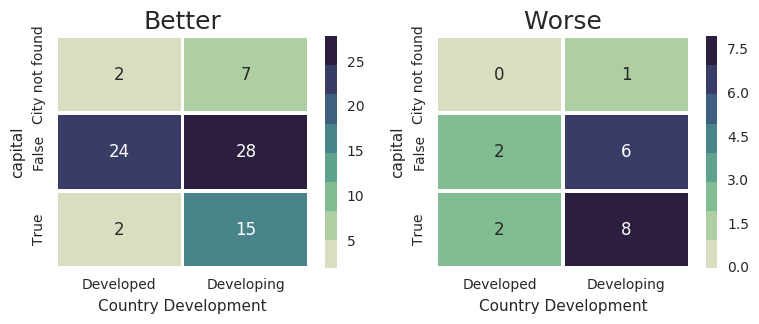

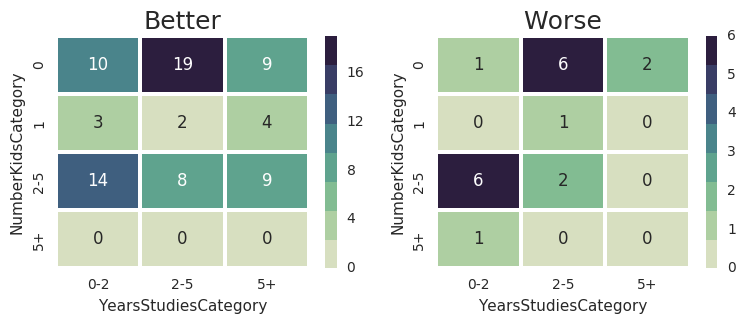

In [173]:
df_better = df_32[df_32['32'] == 'Better']
df_worse = df_32[df_32['32'] == 'Worse']

#typeAnswer : Better/Worse in the case of Q32
def plotDualAttributeHeatmap(cat1, cat2):
    df_1_cross = pd.crosstab(index=df_better[cat1], columns=df_better[cat2])
    df_2_cross = pd.crosstab(index=df_worse[cat1], columns=df_worse[cat2])
    fig, axarr = plt.subplots(1, 2, figsize=(9, 3))
    drawHeatmapSimpleAx(df_1_cross,5,4,True,axarr,0)
    drawHeatmapSimpleAx(df_2_cross,5,4,True,axarr,1)
    axarr[0].set_title('Better', fontsize=18)
    axarr[1].set_title('Worse', fontsize=18)

plotDualAttributeHeatmap('populationCategory', 'AgeCategory')
plotDualAttributeHeatmap('capital', 'Country Development')
plotDualAttributeHeatmap('NumberKidsCategory', 'YearsStudiesCategory')